<a href="https://colab.research.google.com/github/rushikeshkishorkhankar/rushikeshkhankar/blob/main/Lending_Club_Loan_Data_AnalysisFPF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lending Club Loan Data Analysis
Project 2 

DESCRIPTION

Create a model that predicts whether or not a loan will be default using the historical data.

Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

Domain: Finance

Analysis to be done: Perform data preprocessing and build a deep learning prediction model. 

Content: 

Dataset columns and definition:

 

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 

Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [100]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
df = pd.read_csv('/content/drive/MyDrive/project deep/1585898503_datasets/loan_data.csv')

In [103]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [104]:
df.columns = ['CreditPolicy', 'LoanPurpose', 'InterestRate', 'Installment', 'AnnualIncomeLogReport', 
                'DebttoIncomeRatio', 'FICOScore', 'DaysWithCreditLine', 'RevolvingBalance', 'RevolvingUtilizationRate', 
                'InquiriesinlastSixMonths', 'DelinquencyFrequency', 'PublicDerogatoryRecords', 'WillDefault']


In [105]:
df.head()


,CreditPolicy,LoanPurpose,InterestRate,Installment,AnnualIncomeLogReport,DebttoIncomeRatio,FICOScore,DaysWithCreditLine,RevolvingBalance,RevolvingUtilizationRate,InquiriesinlastSixMonths,DelinquencyFrequency,PublicDerogatoryRecords,WillDefault
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [106]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CreditPolicy              9578 non-null   int64  
 1   LoanPurpose               9578 non-null   object 
 2   InterestRate              9578 non-null   float64
 3   Installment               9578 non-null   float64
 4   AnnualIncomeLogReport     9578 non-null   float64
 5   DebttoIncomeRatio         9578 non-null   float64
 6   FICOScore                 9578 non-null   int64  
 7   DaysWithCreditLine        9578 non-null   float64
 8   RevolvingBalance          9578 non-null   int64  
 9   RevolvingUtilizationRate  9578 non-null   float64
 10  InquiriesinlastSixMonths  9578 non-null   int64  
 11  DelinquencyFrequency      9578 non-null   int64  
 12  PublicDerogatoryRecords   9578 non-null   int64  
 13  WillDefault               9578 non-null   int64  
dtypes: float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CreditPolicy              9578 non-null   int64  
 1   LoanPurpose               9578 non-null   object 
 2   InterestRate              9578 non-null   float64
 3   Installment               9578 non-null   float64
 4   AnnualIncomeLogReport     9578 non-null   float64
 5   DebttoIncomeRatio         9578 non-null   float64
 6   FICOScore                 9578 non-null   int64  
 7   DaysWithCreditLine        9578 non-null   float64
 8   RevolvingBalance          9578 non-null   int64  
 9   RevolvingUtilizationRate  9578 non-null   float64
 10  InquiriesinlastSixMonths  9578 non-null   int64  
 11  DelinquencyFrequency      9578 non-null   int64  
 12  PublicDerogatoryRecords   9578 non-null   int64  
 13  WillDefault               9578 non-null   int64  
dtypes: float

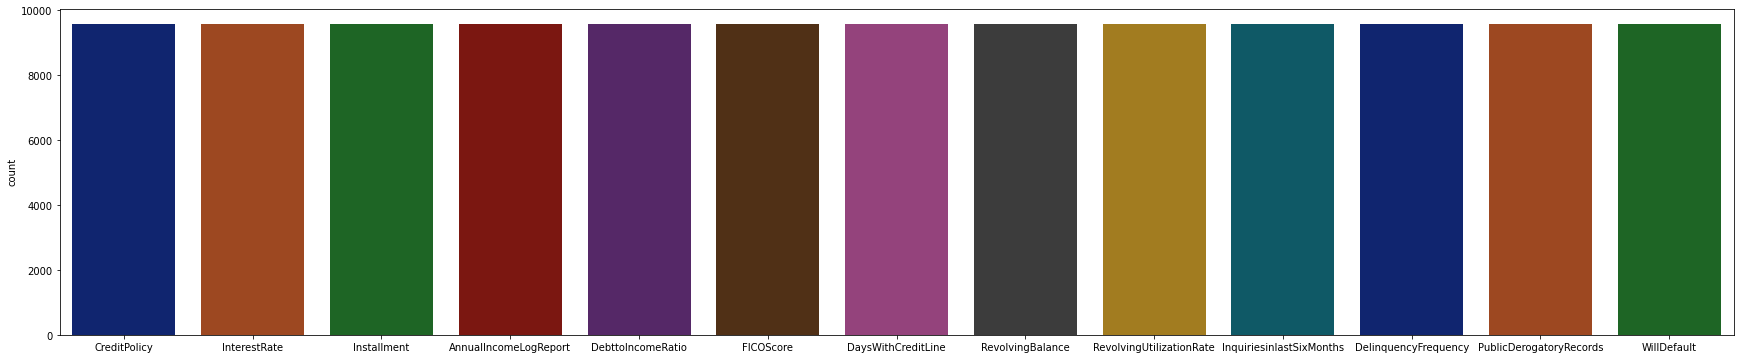

In [107]:
plt.figure(figsize=(30,6))
sns.countplot(data = df, x = df.info(), palette='dark');

In [108]:
from sklearn.preprocessing import LabelEncoder
ft = LabelEncoder()
data_labels = ft.fit_transform(df['LoanPurpose'])
data_mappings = {index: label for index, label in enumerate(ft.classes_)}

In [109]:
data_mappings

{0: 'all_other',
 1: 'credit_card',
 2: 'debt_consolidation',
 3: 'educational',
 4: 'home_improvement',
 5: 'major_purchase',
 6: 'small_business'}

In [110]:
df['LoanPurpose'] = data_labels
df


,CreditPolicy,LoanPurpose,InterestRate,Installment,AnnualIncomeLogReport,DebttoIncomeRatio,FICOScore,DaysWithCreditLine,RevolvingBalance,RevolvingUtilizationRate,InquiriesinlastSixMonths,DelinquencyFrequency,PublicDerogatoryRecords,WillDefault
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,2,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [111]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CreditPolicy              9578 non-null   int64  
 1   LoanPurpose               9578 non-null   int64  
 2   InterestRate              9578 non-null   float64
 3   Installment               9578 non-null   float64
 4   AnnualIncomeLogReport     9578 non-null   float64
 5   DebttoIncomeRatio         9578 non-null   float64
 6   FICOScore                 9578 non-null   int64  
 7   DaysWithCreditLine        9578 non-null   float64
 8   RevolvingBalance          9578 non-null   int64  
 9   RevolvingUtilizationRate  9578 non-null   float64
 10  InquiriesinlastSixMonths  9578 non-null   int64  
 11  DelinquencyFrequency      9578 non-null   int64  
 12  PublicDerogatoryRecords   9578 non-null   int64  
 13  WillDefault               9578 non-null   int64  
dtypes: float

In [112]:
df['LoanPurpose'].unique()

array([2, 1, 0, 4, 6, 5, 3])

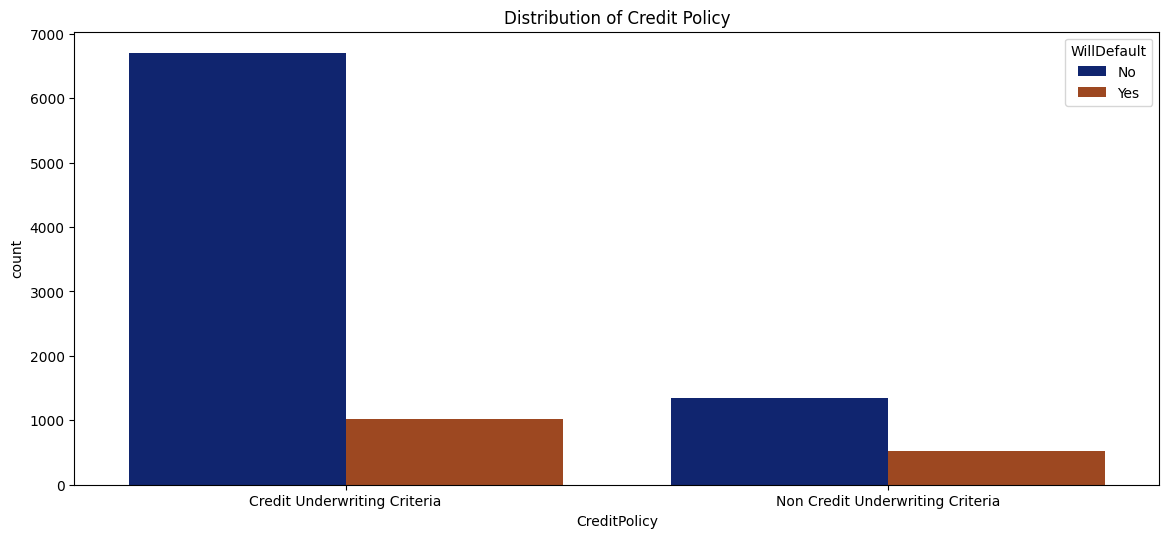

In [113]:
data_policy = df.copy()
data_policy['CreditPolicy'] = data_policy['CreditPolicy'].map({0: 'Non Credit Underwriting Criteria',
                                                                  1: 'Credit Underwriting Criteria'})
data_policy['WillDefault'] = data_policy['WillDefault'].map({0: 'No', 1: 'Yes'})
plt.figure(figsize=(14,6), dpi = 100)
sns.countplot(data = data_policy, x = 'CreditPolicy', hue= 'WillDefault', palette = 'dark')
plt.title('Distribution of Credit Policy')
plt.show()


In [114]:
data_credit = df.groupby('CreditPolicy')

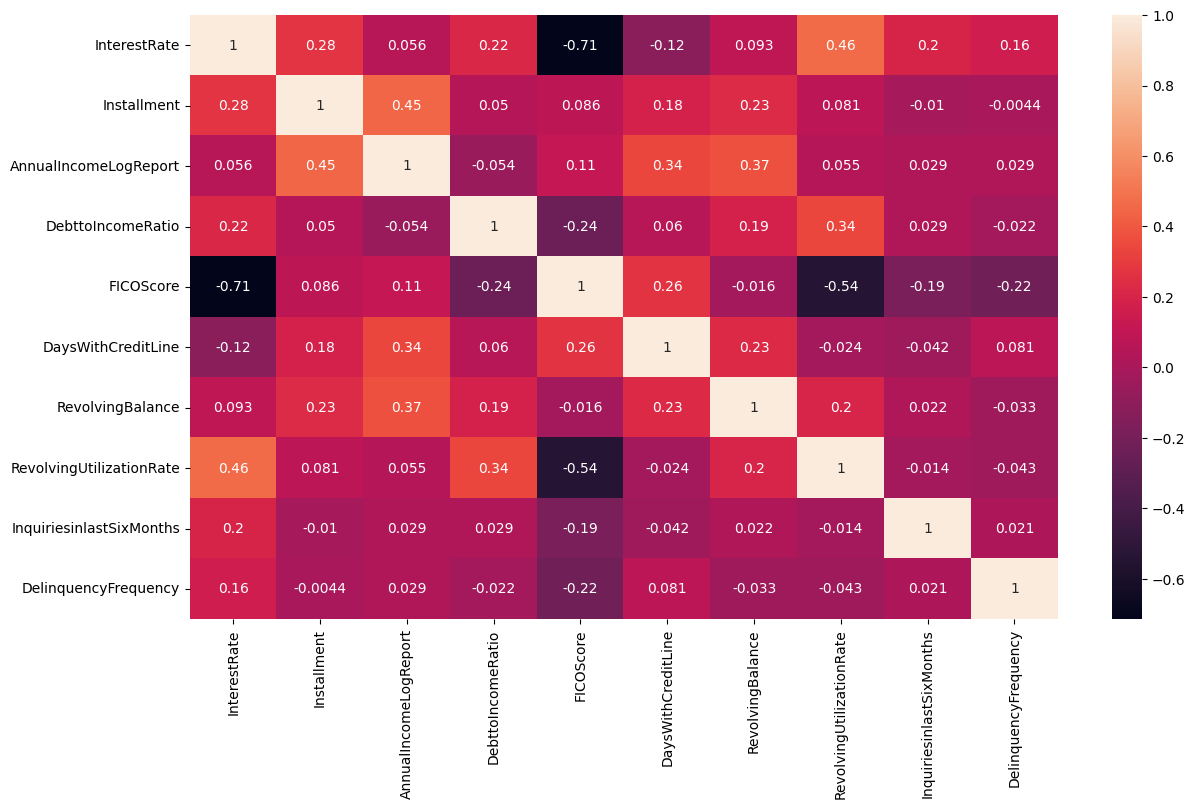

In [115]:
data_corr = df[['InterestRate', 'Installment', 'AnnualIncomeLogReport', 'DebttoIncomeRatio', 
      'FICOScore','DaysWithCreditLine', 'RevolvingBalance', 'RevolvingUtilizationRate',
      'InquiriesinlastSixMonths', 'DelinquencyFrequency']].copy()
plt.figure(figsize=(14,8), dpi = 100)
sns.heatmap(data_corr.corr(),annot=True);

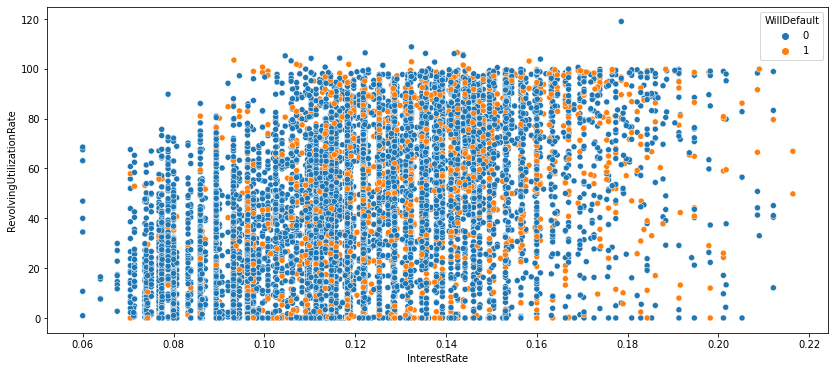

In [116]:
data_scat = df[['InterestRate','RevolvingUtilizationRate','WillDefault']].copy()

plt.figure(figsize = (14,6))

sns.scatterplot(data=data_scat, x = 'InterestRate', y='RevolvingUtilizationRate',hue='WillDefault')

plt.show()

In [117]:
to_train = df[df['WillDefault'].isin([0,1])]
to_pred = df[df['WillDefault'] == 2]

In [118]:
X = to_train.drop('WillDefault', axis=1).values
y = to_train['WillDefault'].values

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [120]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [121]:
model = Sequential()

model.add(Dense(19, activation='relu'))

model.add(Dense(10, activation='relu'))

model.add(Dense(5, activation='relu'))


model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [122]:
model.fit(X_train, y_train, epochs=200, batch_size=256, validation_data=(X_test, y_test),callbacks=[early_stop])

Epoch 1/200
27/27 [==============================] - 1s 13ms/step - loss: 0.6636 - accuracy: 0.8255 - val_loss: 0.6287 - val_accuracy: 0.8459
Epoch 2/200
27/27 [==============================] - 0s 5ms/step - loss: 0.5916 - accuracy: 0.8374 - val_loss: 0.5389 - val_accuracy: 0.8459
Epoch 3/200
27/27 [==============================] - 0s 10ms/step - loss: 0.5046 - accuracy: 0.8374 - val_loss: 0.4578 - val_accuracy: 0.8459
Epoch 4/200
27/27 [==============================] - 0s 10ms/step - loss: 0.4525 - accuracy: 0.8374 - val_loss: 0.4320 - val_accuracy: 0.8459
Epoch 5/200
27/27 [==============================] - 0s 5ms/step - loss: 0.4445 - accuracy: 0.8374 - val_loss: 0.4290 - val_accuracy: 0.8459
Epoch 6/200
27/27 [==============================] - 0s 5ms/step - loss: 0.4421 - accuracy: 0.8374 - val_loss: 0.4268 - val_accuracy: 0.8459
Epoch 7/200
27/27 [==============================] - 0s 5ms/step - loss: 0.4392 - accuracy: 0.8374 - val_loss: 0.4245 - val_accuracy: 0.8459
Epoch 8/20

In [123]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 19)                266       
                                                                 
 dense_45 (Dense)            (None, 10)                200       
                                                                 
 dense_46 (Dense)            (None, 5)                 55        
                                                                 
 dense_47 (Dense)            (None, 1)                 6         
                                                                 
Total params: 527
Trainable params: 527
Non-trainable params: 0
_________________________________________________________________


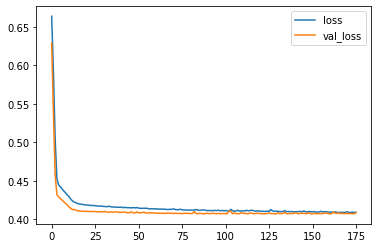

In [124]:
pd.DataFrame(model.history.history)[['loss','val_loss']].plot()

In [125]:
model_new = Sequential()

model_new.add(
        Dense(19, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(10, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(5, activation='relu')
)

model_new.add(Dropout(0.2))

model_new.add(
        Dense(1, activation='sigmoid')
)

model_new.compile(
        optimizer='adam', 
        loss='binary_crossentropy', 
        metrics=['binary_accuracy']
)


model_new.fit(
        X_train, 
        y_train, 
        epochs=200, 
        batch_size=256, 
        validation_data=(X_test, y_test),
         callbacks=[early_stop]
)

Epoch 1/200
27/27 [==============================] - 1s 11ms/step - loss: 0.6653 - binary_accuracy: 0.6553 - val_loss: 0.6029 - val_binary_accuracy: 0.8459
Epoch 2/200
27/27 [==============================] - 0s 7ms/step - loss: 0.5662 - binary_accuracy: 0.8040 - val_loss: 0.4850 - val_binary_accuracy: 0.8459
Epoch 3/200
27/27 [==============================] - 0s 6ms/step - loss: 0.5229 - binary_accuracy: 0.8262 - val_loss: 0.4471 - val_binary_accuracy: 0.8459
Epoch 4/200
27/27 [==============================] - 0s 5ms/step - loss: 0.5034 - binary_accuracy: 0.8353 - val_loss: 0.4397 - val_binary_accuracy: 0.8459
Epoch 5/200
27/27 [==============================] - 0s 5ms/step - loss: 0.5001 - binary_accuracy: 0.8371 - val_loss: 0.4380 - val_binary_accuracy: 0.8459
Epoch 6/200
27/27 [==============================] - 0s 7ms/step - loss: 0.4897 - binary_accuracy: 0.8373 - val_loss: 0.4367 - val_binary_accuracy: 0.8459
Epoch 7/200
27/27 [==============================] - 0s 5ms/step - lo

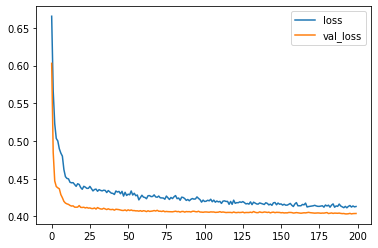

In [126]:
pd.DataFrame(model_new.history.history)[['loss','val_loss']].plot() 


In [127]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 19)                266       
                                                                 
 dense_45 (Dense)            (None, 10)                200       
                                                                 
 dense_46 (Dense)            (None, 5)                 55        
                                                                 
 dense_47 (Dense)            (None, 1)                 6         
                                                                 
Total params: 527
Trainable params: 527
Non-trainable params: 0
_________________________________________________________________


In [132]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.845
Loss: 0.409


In [134]:
y_predict = model.predict(X_test)

In [135]:
y_predict[0]


array([0.12976784], dtype=float32)

In [136]:
np.argmax(y_predict[0])


0

In [137]:
from sklearn import metrics
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[2431    0]
 [ 443    0]]


In [139]:
cr=metrics.classification_report(y_test,y_pred);
print(cr);

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
